# Task 12 (Histogram)
## Subtask 1: Function from the Jupiter notebook is plotted with suggested number of points

In [23]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

@cp.fuse()
def f(x):
    return (cp.power(z(x),2) + cp.power(z(x),3) - 200 * cp.power(z(x),4)) * cp.sin(1e5 * (x + 0.5))

@cp.fuse()
def z(x):
    return cp.sin(3 * x) - 0.5

start, end = 0, 1
points = 10**7
x = cp.linspace(start, end, points)
y = f(x)
f_min = y.min()
f_max = y.max()
delta = 0.1 * (f_max - f_min)

print('Min: {}. Max {}.'.format(f_min, f_max))

Min: -12.365544666168107. Max 12.374912294071224.


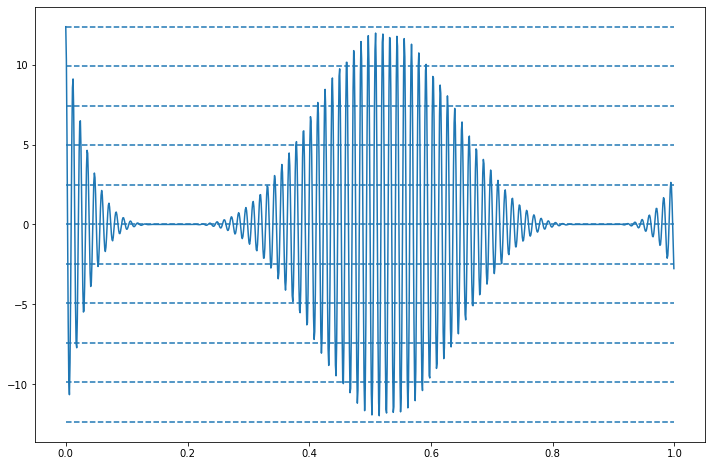

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(x.get()[::10000], y.get()[::10000]) # take each 10000th point to plot
plt.hlines([np.float(f_min + i * delta) for i in range(11)], 0, 1, linestyles='--')

## Subtask 2: Histogram is ploted

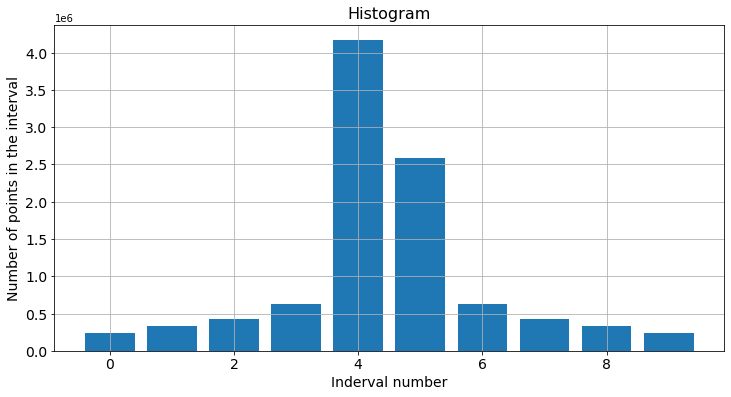

In [26]:
points_list = []
for i in range(10):
    in_points = ((f_min + (i+1)*delta) > y) & (y > (f_min + i*delta)) #
    in_points = cp.sum(in_points)
    in_points = cp.asnumpy(in_points)
    points_list.append(in_points)
points_list = np.array(points_list)

plt.figure(figsize=(12, 6))
plt.bar(np.arange(10),points_list)
plt.title('Histogram', fontsize=16)
plt.xlabel('Inderval number', fontsize=14)
plt.ylabel('Number of points in the interval', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

## Subtask 3: Computation time of cp.sum() and np.sum() are provided (just functions without graph)

In [28]:
i = 1
cp_in_points = ((f_min + (i+1)*delta) > y) & (y > (f_min + i*delta))
np_in_points = cp.asnumpy(cp_in_points)

In [29]:
%timeit -n 100 cp.sum(cp_in_points)

16.3 µs ± 5.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
%timeit -n 100 np.sum(np_in_points)

7.17 ms ± 155 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
